In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lzwD(compressed):
    x = 256
    dictionary = dict([(i, chr(i)) for i in range(x)])
    string = ""
    decompressed = ""
    data = []
    for code in compressed:
        if not code in dictionary:
            dictionary[code] = string + (string[0])
        decompressed += dictionary[code]
        if not(len(string) == 0):
            dictionary[x] = string + (dictionary[code][0])
            x += 1
        string = dictionary[code]
    
    for char in decompressed:
        data.append(ord(char))
    
    return data
            

def lzw_decode(lzwEncodedArray):
    data = lzwD(lzwEncodedArray)
    return np.array(data)

(-0.5, 255.5, 255.5, -0.5)

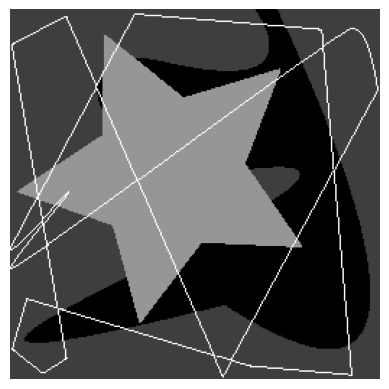

In [3]:
# txtFile = input('Enter the LZW coded file name: ')
txtFile = 'img_lzwcode.txt'

file = open(txtFile, 'r')
lzwEncodedArray = []
i = -1
for line in file:
    if i == -1:
        h, w, blockSize = line.split()
        h, w, blockSize = int(h), int(w), int(blockSize)
        img = np.zeros((h * w), dtype=np.uint8)
        i = 0
        continue
    lzwEncodedArray = line.split()
    lzwEncodedArray = [int(x) for x in lzwEncodedArray]
    img[i:i+blockSize] = lzw_decode(lzwEncodedArray)
    i += blockSize
img = img.reshape(h, w)

plt.imshow(img, cmap='gray'); plt.axis('off')
